# AD05 - Cálculos sobre arranjos multidimensionais

Vamos acompanhar juntos alguns exemplos para ver como podemos fazer diferentes cálculos sobre arranjos multidimensionais. Usaremos numpy, portanto vamos carregar com o nome **np**. Para visualizar as matrizes, utilizaremos **matplotlib** e **seaborn**.

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

## Funções para visualizar a matriz

In [23]:
def generate (a):
    plt.close()
    plt.figure(figsize=(3, 3))
    sns.heatmap(a, annot=True, linecolor = 'black', linewidth = 1, cbar=False, cmap=["white"], fmt="d")

## Criação de uma matriz

Vamos criar um arranjo 2D (uma matriz):

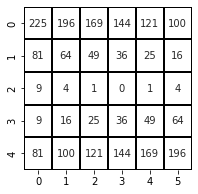

In [24]:
a = np.arange(-15, 15).reshape(5, 6) ** 2
generate(a)

## Obter o máximo de cada linha

In [25]:
a.max()
a.max(axis = 1)

array([225,  81,   9,  64, 196])

## Obter a média de cada coluna

In [26]:
a.mean()
a.mean(axis = 0)

array([81., 76., 73., 72., 73., 76.])

## Obter a posição do mínimo global

In [27]:
a.min()
a==a.min()
np.where(a == a.min())

(array([2]), array([3]))

# Teste com uma tabela maior (10K linhas)


Baixar os dados (observações de peso e altura de pessoas):
- Coluna 0: "Male" ou "Female"
- Coluna 1: Altura
- Coluna 2: Peso

In [28]:
!wget https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv -O weight-height.csv
!head weight-height.csv

--2022-10-18 13:31:20--  https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [text/plain]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.03s   

2022-10-18 13:31:20 (11.7 MB/s) - ‘weight-height.csv’ saved [428120/428120]

"Gender","Height","Weight"
"Male",73.847017017515,241.893563180437
"Male",68.7819040458903,162.310472521300
"Male",74.1101053917849,212.7408555565
"Male",71.7309784033377,220.042470303077
"Male",69.8817958611153,206.349800623871
"Male",67.2530156878065,152.212155757083
"Male",68.7850812516616,183.927888604031
"Male",68.3485155115879,167.971110489509
"Male",67.018949662883,175.92944039571


## Ler os dados

Vamos ler os dados somente das colunas 1 (altura) e 2 (peso).

In [29]:
a = np.loadtxt("weight-height.csv",
            skiprows = 1,
            dtype = float,
            delimiter = ",",
            usecols = (1, 2))

a[:,0] = a[:,0] * 0.0254 # Converter inches para m 
a[:,1] = a[:,1] * 0.45359237 # Converter pounds para kg
a

array([[  1.87571423, 109.72107461],
       [  1.74706036,  73.62279191],
       [  1.88239668,  96.49762887],
       ...,
       [  1.622247  ,  58.27542433],
       [  1.75346978,  74.32222627],
       [  1.57338385,  51.55036583]])

## Tarefas

Consultamos as funções universais (*ufuncs*) no site:

https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs

#### Qual a maior altura e peso?

In [30]:
a.max(axis = 0)

array([  2.00656806, 122.46526722])

#### Qual a menor altura e peso?

In [31]:
a.min(axis = 0)

array([ 1.37828359, 29.34748381])

#### Qual a média do peso e da altura de todas as pessoas?

In [32]:
a.mean(axis=0)

array([ 1.68573602, 73.22811407])

#### Qual a idade da pessoa que tem o peso mínimo?

In [39]:
# a[:,1][a[:,0].min() == a[:,0]]
# a[:,1].min() == a[:,1]
a[:,0][a[:,1].min() == a[:,1]]


array([1.37828359])

#### Qual o peso médio das 10 pessoas mais altas?

In [34]:
ind = np.argsort(a, axis=0)
b = np.take_along_axis(a, ind, axis=0)[-10:,:]
b

array([[  1.95836215, 113.20106467],
       [  1.95988434, 113.37372697],
       [  1.96714415, 113.54194962],
       [  1.96762546, 114.04448455],
       [  1.96969853, 114.55778732],
       [  1.98363503, 115.16211497],
       [  1.99293614, 115.30729598],
       [  1.99461654, 115.97941176],
       [  1.9969829 , 116.05765266],
       [  2.00656806, 122.46526722]])

In [35]:
b.mean(axis = 0)

array([  1.97974533, 115.36907557])